In [ ]:
pip install konlpy

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Okt
from wordcloud import WordCloud
from datetime import datetime
from konlpy.corpus import kolaw
import numpy as np
from collections import Counter

In [ ]:
date = str(datetime.today().strftime("%Y%m%d"))[2:]
url = f"https://news.naver.com/main/ranking/popularDay.nhn?date={date}"

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(url, headers = headers)

soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowled_title = [news_titles[i].text for i in range(len(news_titles))]
title = "".join(crowled_title)

In [ ]:
replace_data = [".", '"', "'", ",", "?", "!", "·", "=", "\n", "…"]
for i in replace_data:
  title.replace(i, ' ')

okt = Okt()
token_ko = okt.nouns(title)
words = [n for n in token_ko if len(n) > 1]

c = Counter(words)

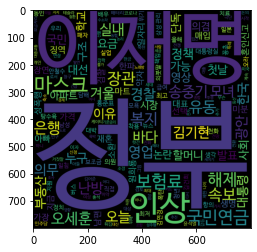

In [ ]:
font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wc = WordCloud(font_path=font,width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)